<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [93]:
df = pd.read_csv("Mall_Customers.csv")

## EDA

In [94]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
df.shape

(200, 5)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [97]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [98]:
df.isnull().values.any()

False

## Data Preprocessing

## Strorytelling - Visualization

#### Gender distribution

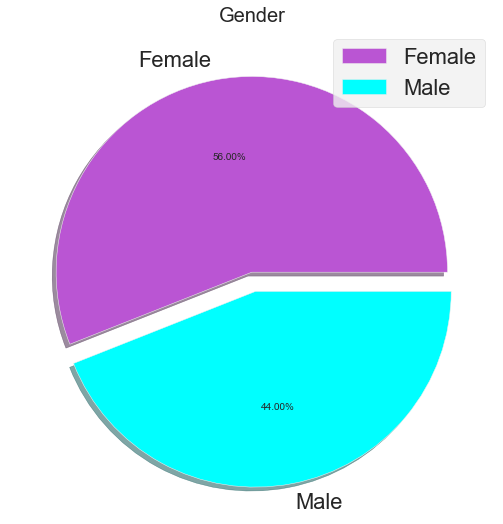

In [99]:
labels = ["Female","Male"]
size = df["Gender"].value_counts()
colors  = ["mediumorchid","cyan"]
explode = [0,0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### Age distribution

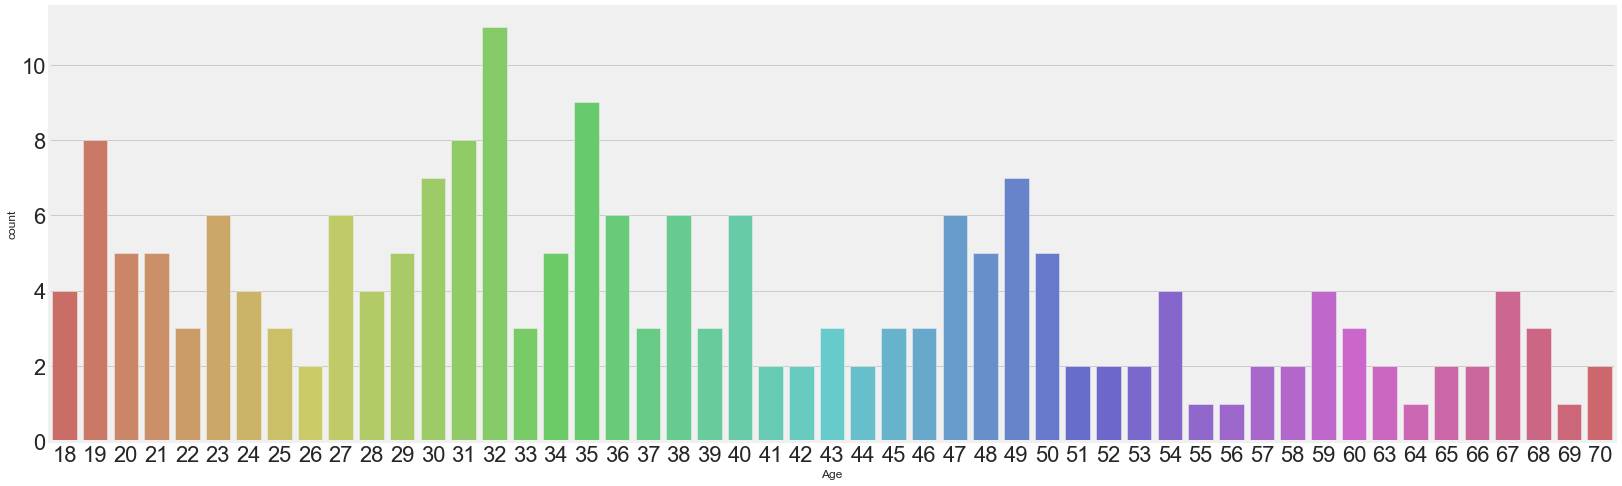

In [100]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(df['Age'], palette = 'hls')
plt.show()

#### Spending Score distribution 

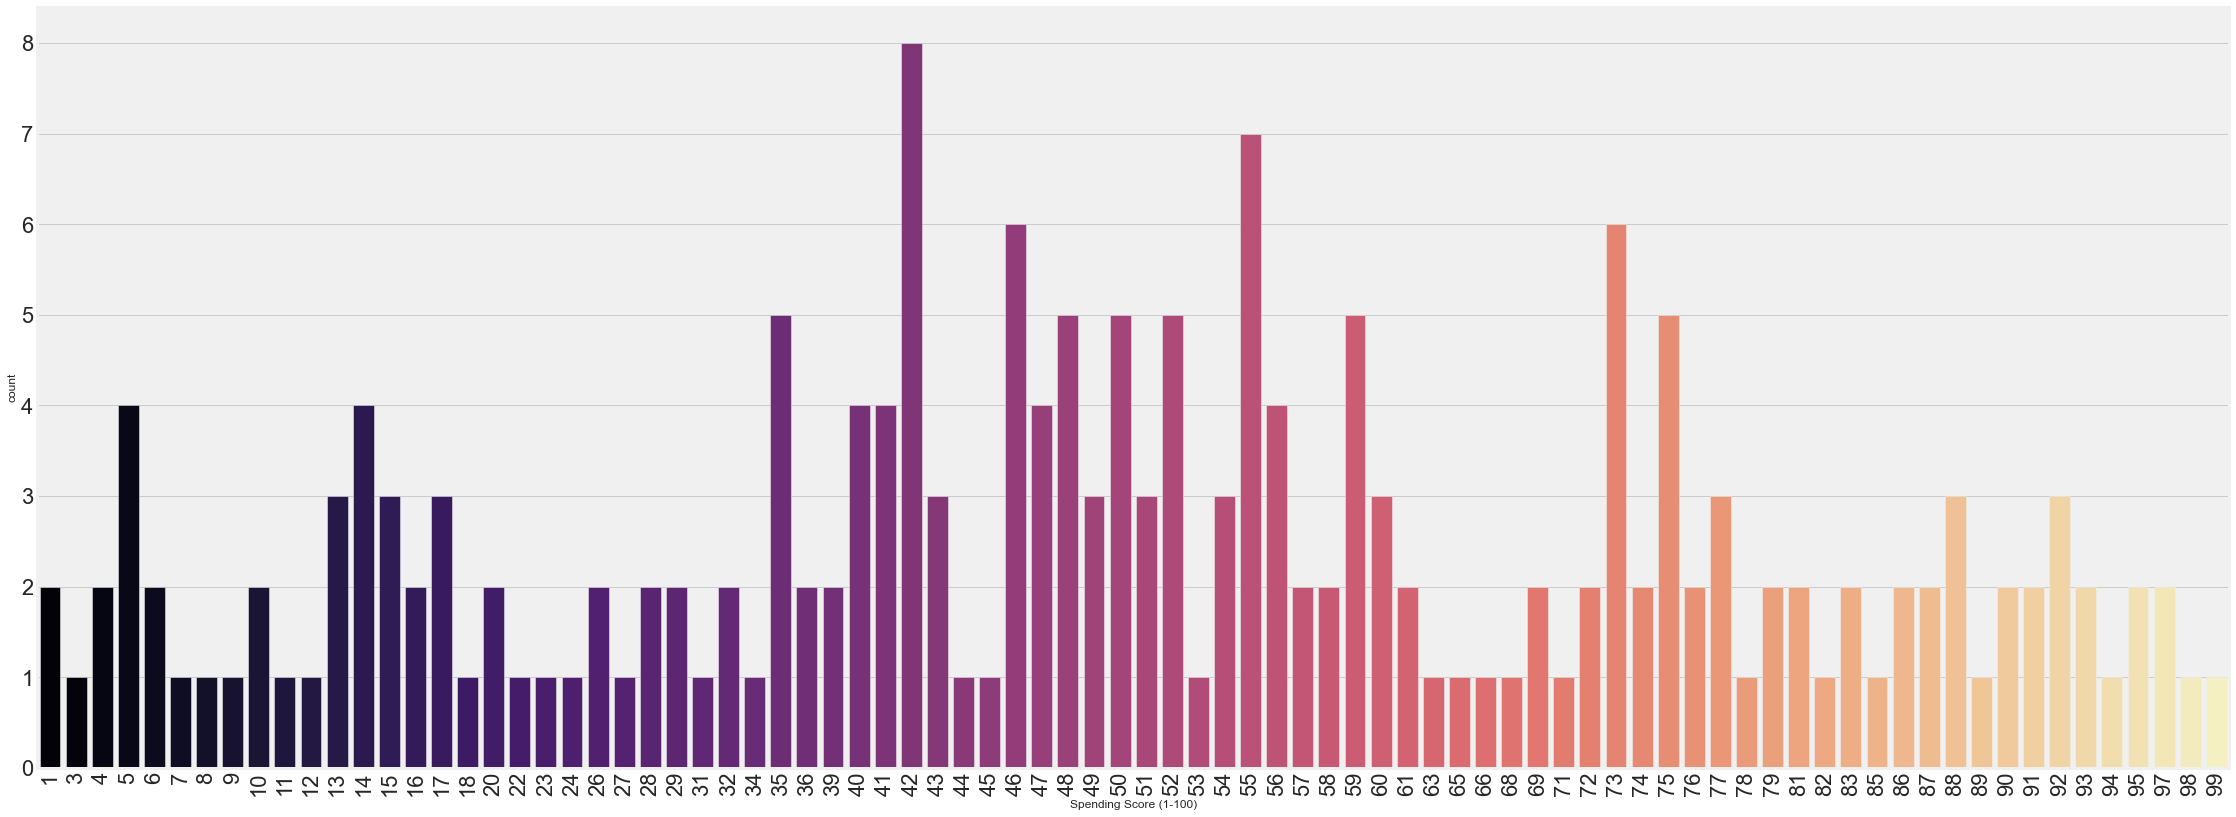

In [101]:
plt.rcParams['figure.figsize'] = (35, 14)
plt.xticks(rotation=90)
sns.countplot(df['Spending Score (1-100)'], palette = 'magma')
plt.show()

#### Age vs Annual Income

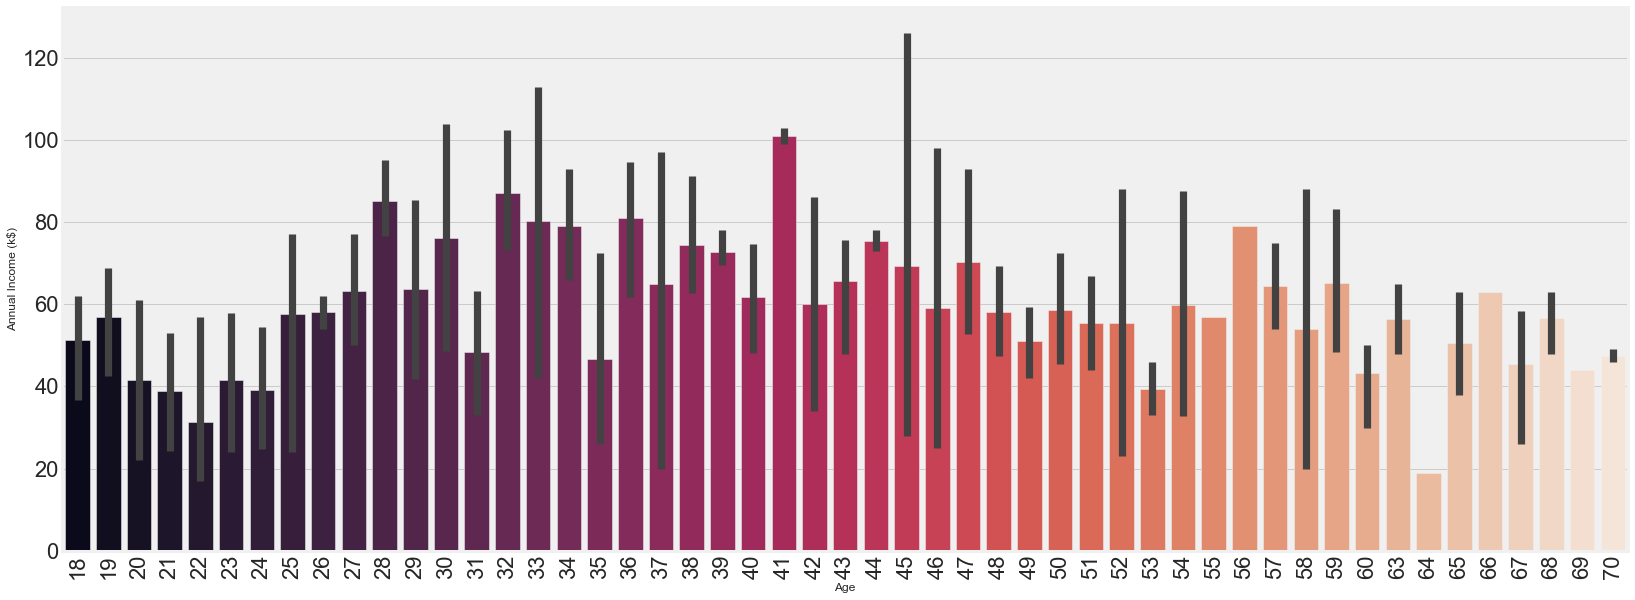

In [102]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x = df['Age'] , y = df['Annual Income (k$)'] , palette='rocket');

#### Age vs Spending Score

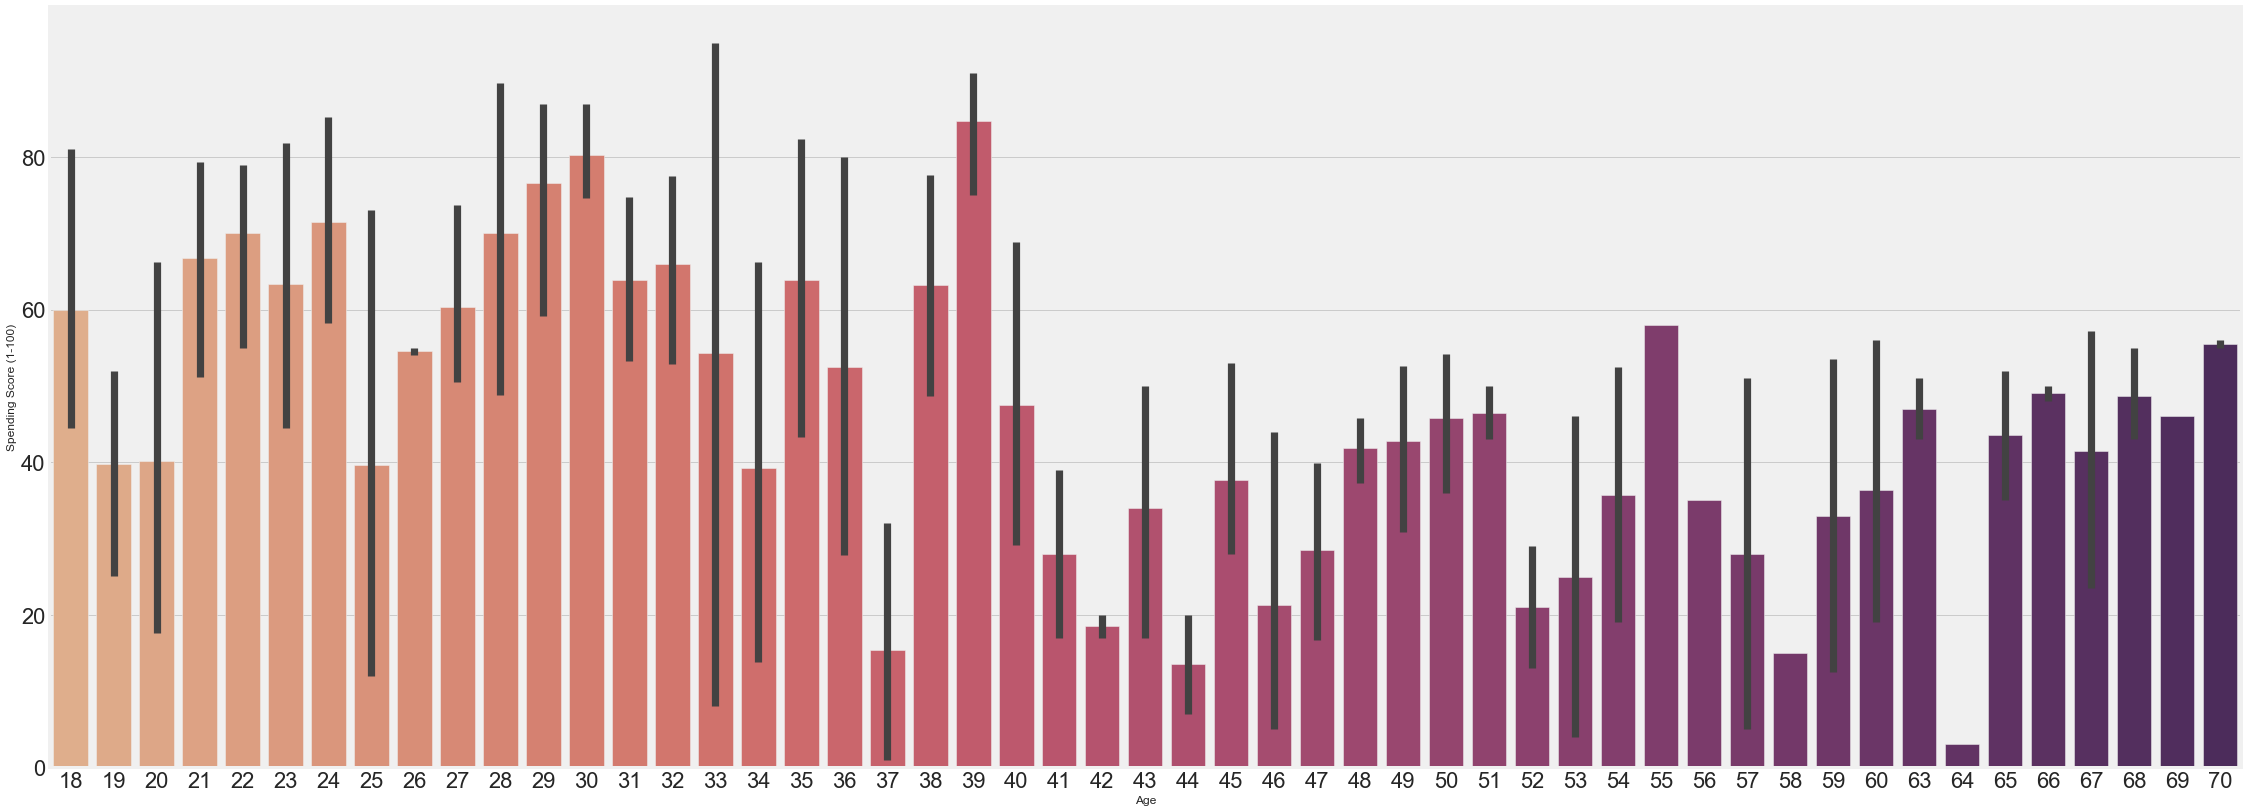

In [103]:
ax = sns.barplot(y= "Spending Score (1-100)", x = "Age", data = df, palette=("flare"))
sns.set_context("poster")

#### Gender vs Spending Score

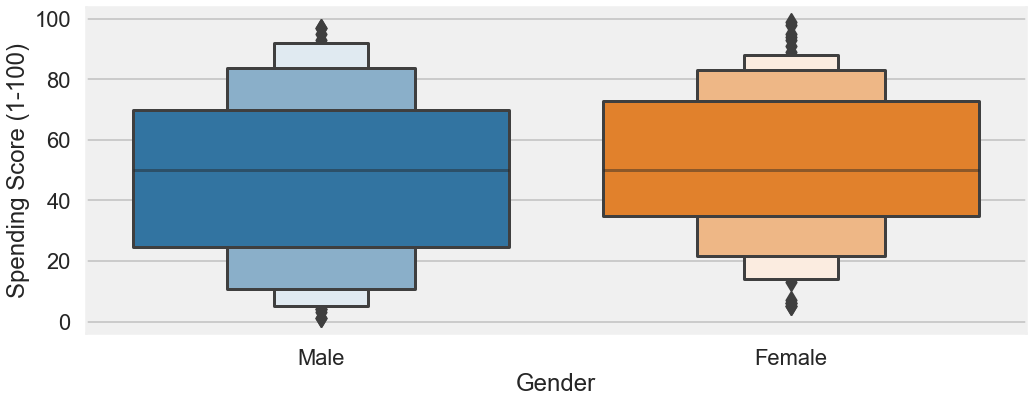

In [104]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'], palette = 'tab10')
plt.show()

#### Gender vs Annual Income

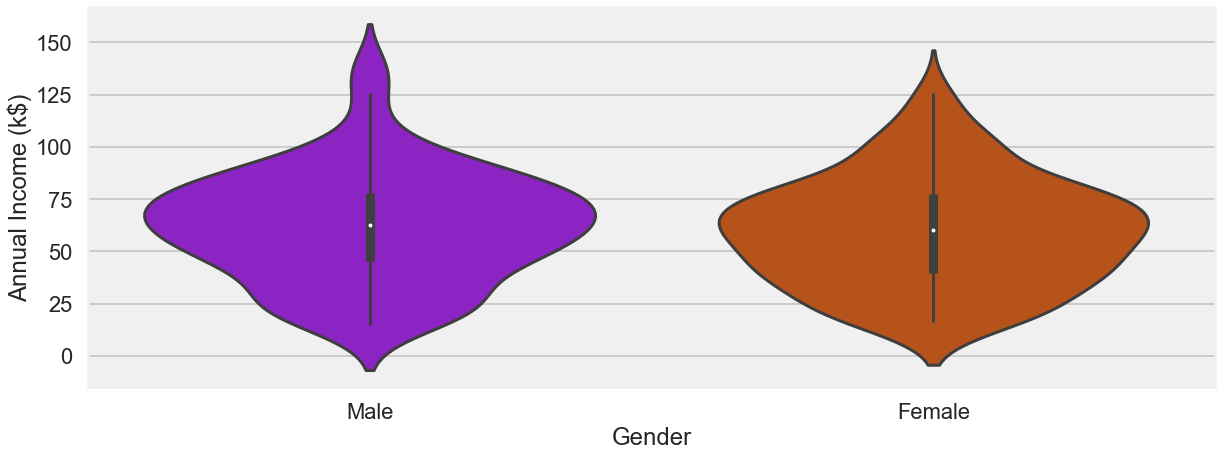

In [105]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'gnuplot')
plt.show()

#### Annual Income vs Spending Score

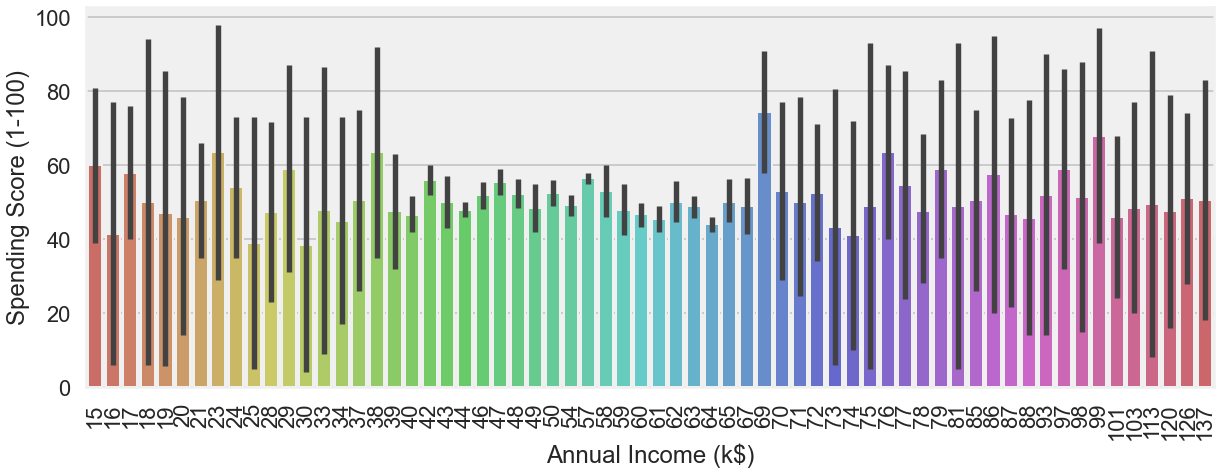

In [106]:
ax = sns.barplot(y= "Spending Score (1-100)", x = "Annual Income (k$)", data = df, palette=("hls"))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.set(rc={'figure.figsize':(30,7)})
sns.set_context("poster")

#### Annual Income vs Age vs Spending Score

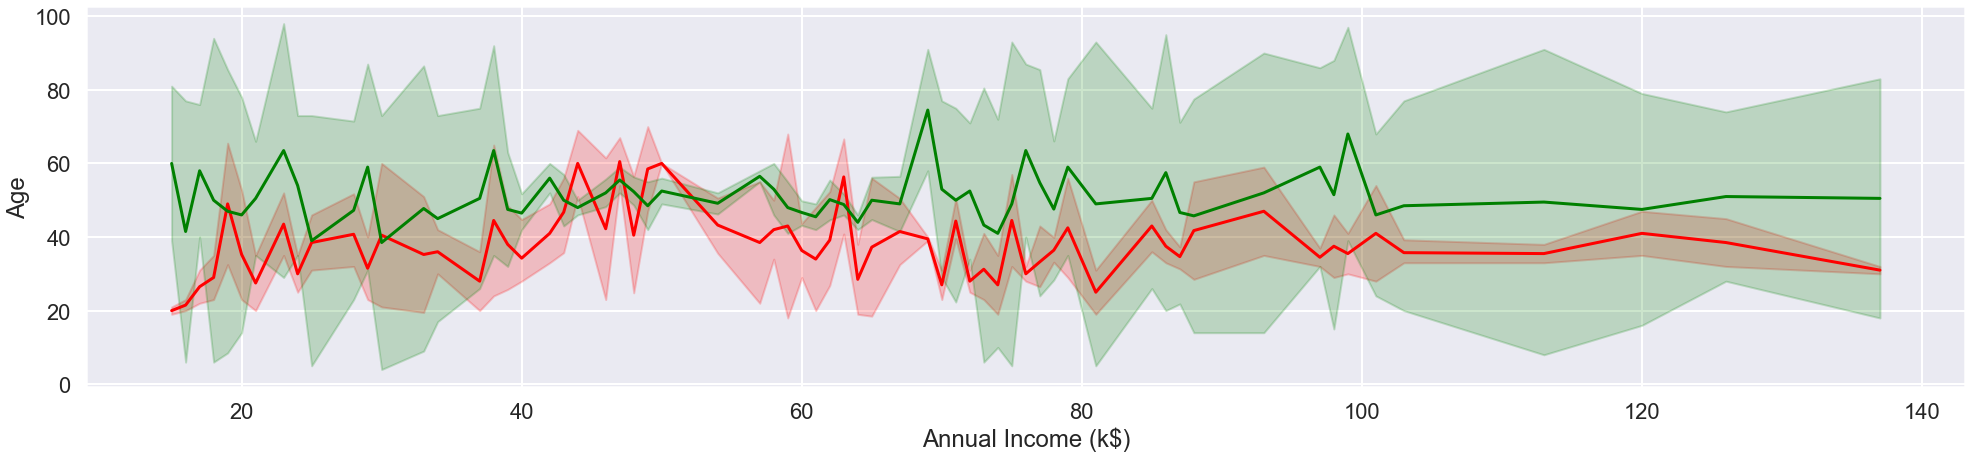

In [107]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']
sns.lineplot(x, y, color = 'red', palette = 'hls')
sns.lineplot(x, z, color = 'green', palette = 'hls')
plt.show()

#### Correlation Heatmap

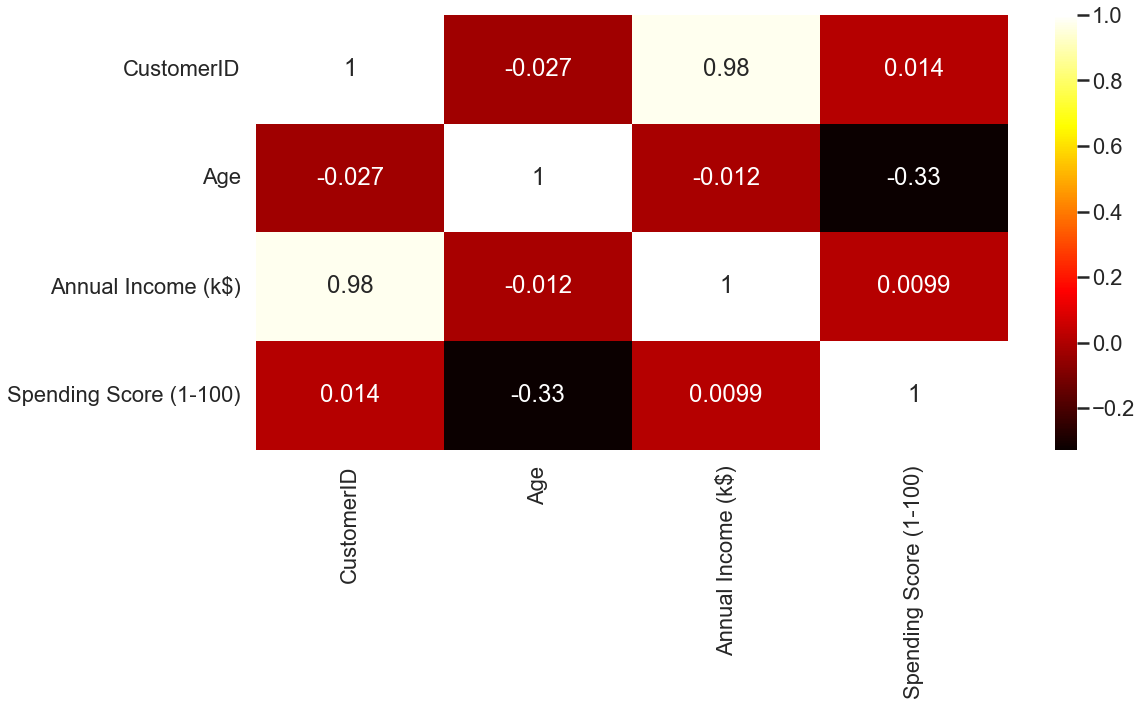

In [108]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'hot', annot = True)
plt.show()

## Train the Model (Clustering)

In [109]:
x = df.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


#### Elbow method

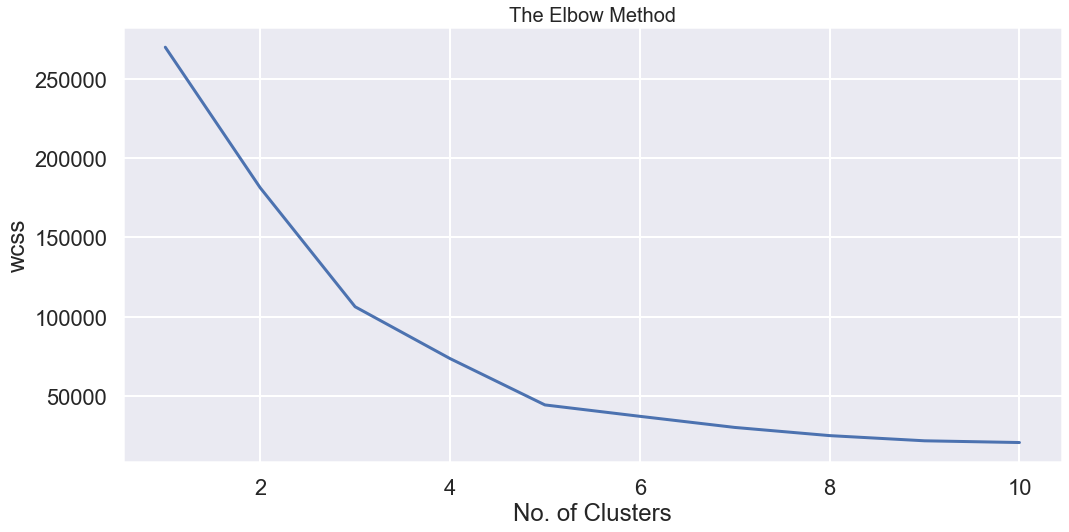

In [110]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#### K-means

In [111]:
model_kn = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = model_kn.fit_predict(x)

#### Clusters visualization

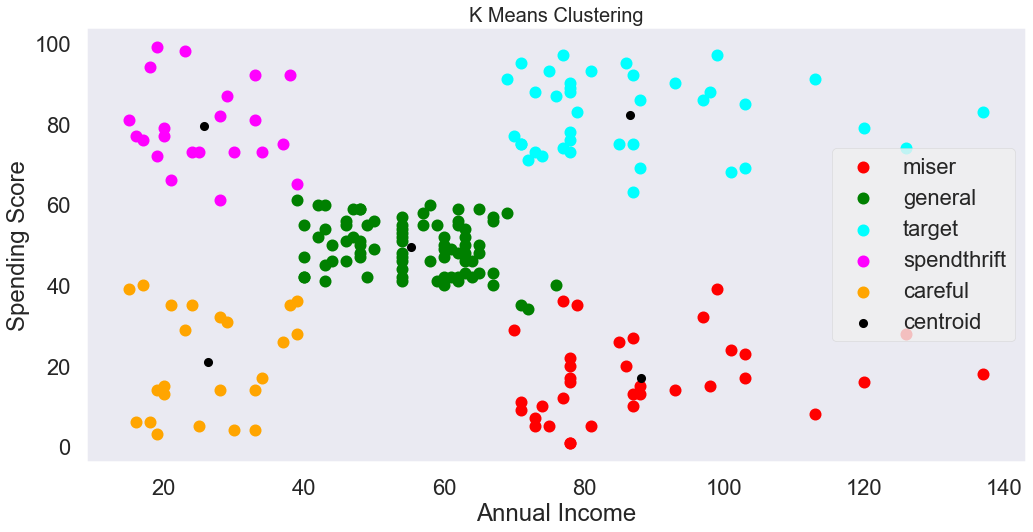

In [112]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'green', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(model_kn.cluster_centers_[:,0], model_kn.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centroid')
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## Send us the Result (Maktabkhoone)